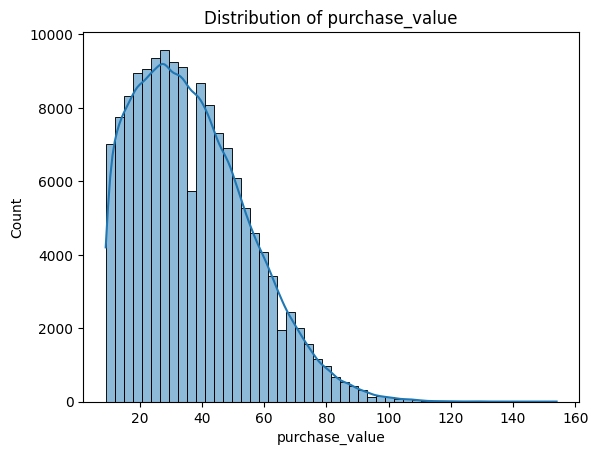

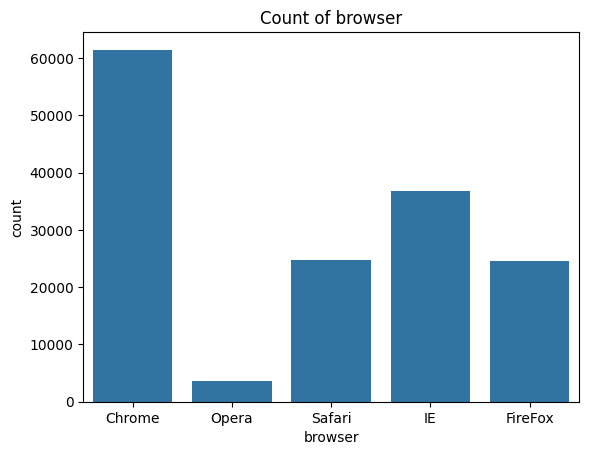

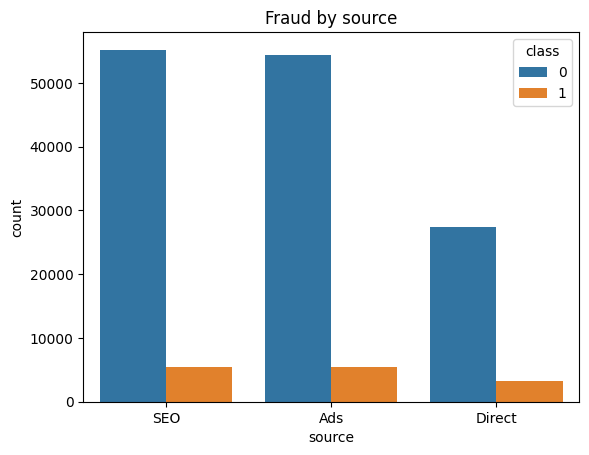

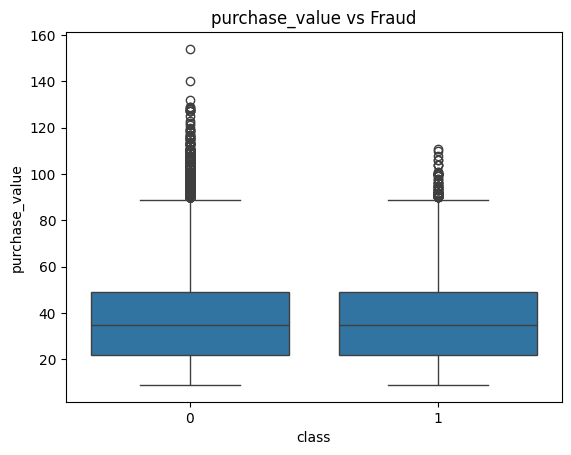

In [2]:
import os
import sys
import importlib
sys.path.append(os.path.abspath(".."))
import src.preprocessing
importlib.reload(src.preprocessing)

import src.eda
importlib.reload(src.eda)
import src.features
importlib.reload(src.features)


from src.preprocessing import Preprocessor
from src.eda import EDA
from src.features import FeatureEngineer

# Load and preprocess
pp = Preprocessor(
    fraud_path='../data/Fraud_Data.csv',
    ip_path='../data/IpAddress_to_Country.csv',
    credit_path='../data/creditcard.csv'
)
fraud_df, ip_df, _ = pp.load_data()
pp.convert_datetime_columns()
pp.convert_ip_to_int()
fraud_df = pp.fraud_df

# Run EDA
eda = EDA(fraud_df)
eda.plot_distribution('purchase_value')
eda.plot_count('browser')
eda.plot_fraud_by_category('source')
eda.plot_box('purchase_value')

# Feature engineering
fe = FeatureEngineer(fraud_df)
fraud_df = fe.add_time_features()
fraud_df = fe.add_transaction_frequency()
fraud_df = fe.add_country_from_ip(ip_df)
